# Data Collection: มาเก็บรวบรวมข้อมูลจากแหล่งต่าง ๆ (DB & REST API) กันเถอะ!

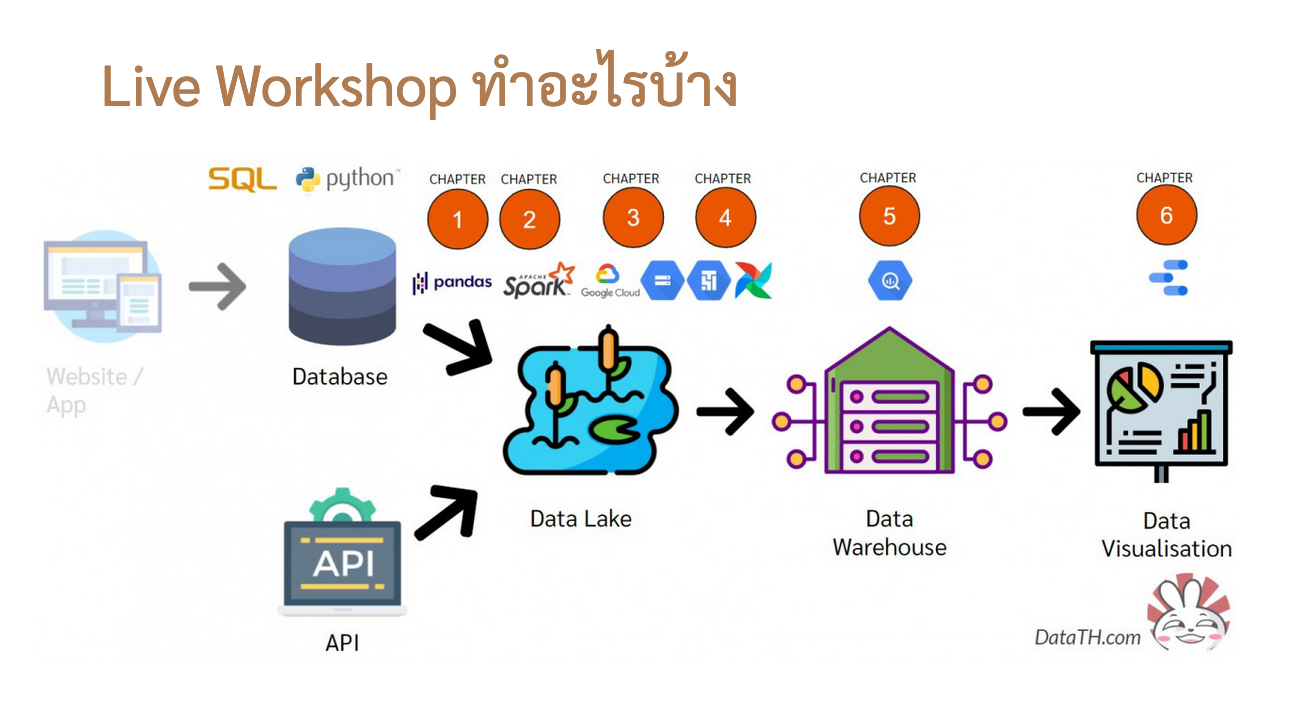


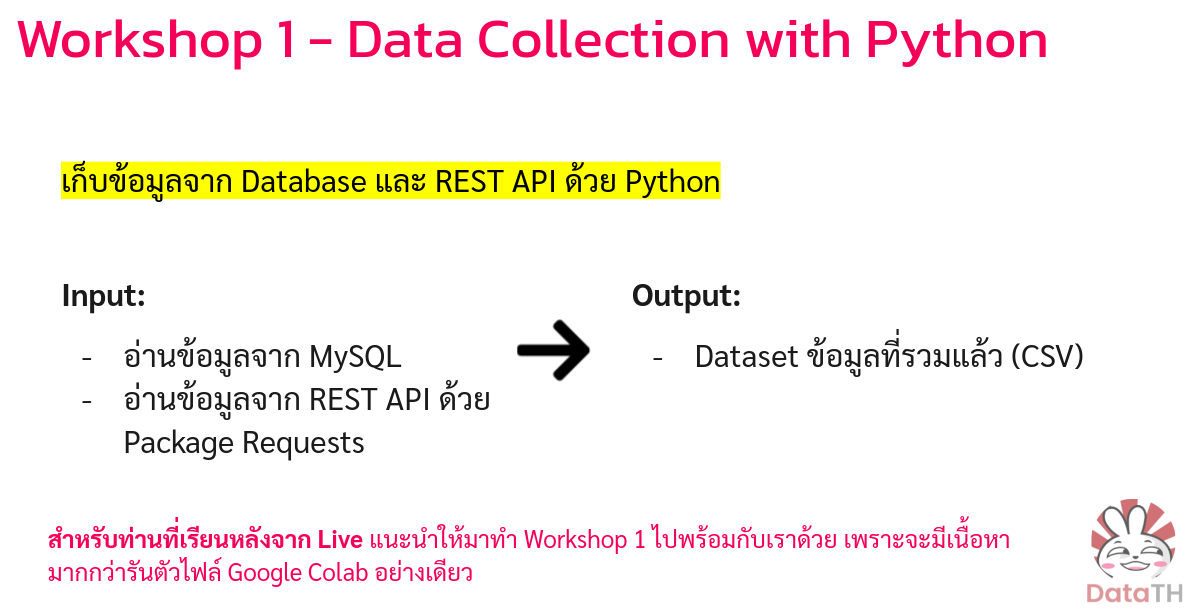

# อ่านข้อมูลจาก MySQL database

## Install PyMySQL 
ซึ่งเป็น package สำหรับเชื่อมต่อ MySQL database

In [1]:
! pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.3 MB/s 


ขึ้นตอนแรกสำหรับการต่อ database คือการสร้าง connection ซึ่งต้องอาศัย config ต่าง ๆ เช่น Host (IP address), Username, Password ในการเชื่อมต่อ เป็นต้น บางอย่างก็ต้องเก็บเป็นความลับ

## Config DB credential: การใช้ config สำหรับเชื่อต่อ database
ಥ_ಥ  คำเตือน: Cell ด้านล่างนี้เป็นความลับสุดยอด เขียนขึ้นมาเพื่อให้เห็นวิธีการในการเชื่อมต่อ database เท่านั้น **ห้ามเอา "plain text"แบบนี้ไปใช้ในชีวิตจริง**

มีข้อปฏิบัติในการเก็บรักษาไฟล์ที่เป็นความลับ (secret) ดังนี้
*   **ห้าม**เขียน credential (ความลับ) ลงมาใน code ตรง ๆ
*   **ห้าม** commit credential ในโค้ดลง Git เด็ดขาด
*   credential ควรเป็น environment variable / ไฟล์ .env / หรือ config file ที่เหมาะสม
*   **ห้าม** commit config file หรือ .env ไฟล์ดังกล่าวที่มี key หรือ password ขึ้น Git ด้วย
*   ควรใช้ระบบ secret management เพื่อเก็บ credential อย่างปลอดภัย เช่น Vault หรือ Secret Manager ของ Cloud แต่ละที่
*   การขัดต่อคำแนะนำตามที่กล่าวมาถือว่าไม่ควรทำอย่างยิ่ง

༼ つ ◕_◕ ༽つ  **Bonus**: ในท้าย workshop จะมีการพูดถึงการเก็บพาสเวิร์ดใน .env ซึ่งใช้กันทั่วไป และใช้งานกับ python ด้วย package python-dotenv  
 

สามารถดู password ของ database ได้ที่: https://school.datath.com/courses/road-to-data-engineer-2/contents/611fc12108727 

In [2]:
# TODO: ใส่ database credential จากลิงค์ database ด้านบน (เพื่อการเรียนรู้)
import os

class Config:
  MYSQL_HOST = '34.136.184.58'
  MYSQL_PORT = 3306              # default สำหรับ port MySQL
  MYSQL_USER = 'r2de2'
  MYSQL_PASSWORD = 'I_Love_Data_Engineer'
  MYSQL_DB = 'r2de2'
  MYSQL_CHARSET = 'utf8mb4'

In [3]:
# ทดลอง print จาก config
print(Config.MYSQL_PORT)

3306


## Connect to DB
หลังจากที่มี Credential ของ database แล้วก็สร้าง connection โดยการ connect ไปที่ DB ด้วย Config ของเรา

In [4]:
import pymysql

# Connect to the database
connection = pymysql.connect(host=Config.MYSQL_HOST,
                             port=Config.MYSQL_PORT,
                             user=Config.MYSQL_USER,
                             password=Config.MYSQL_PASSWORD,
                             db=Config.MYSQL_DB,
                             charset=Config.MYSQL_CHARSET,
                             cursorclass=pymysql.cursors.DictCursor)

cursors เป็น object ของ database ที่เอาไว้ใช้ในการเข้าถึง data การใช้งานจึงเป็นไปตามการออกแบบของแต่ละ database  ในกรณีนี้ก็จะใช้อ้างอิงตาม documentation ของ PyMySQL แล้วสามารถอ้างอิง                                                                                                                                                                                                                                                                                            โค้ดตามนั้นได้เลย https://pymysql.readthedocs.io/en/latest/user/examples.html 

In [5]:
connection

ตัวแปร connection นี้ เราได้ connect ต่อเข้ากับ database เอาไว้แล้ว
## List Tables
เรามาลองดูกันว่ามี table อะไรในนั้นบ้าง

In [6]:
# list all tables ด้วย SQL คำสั่ง show tables;
cursor = connection.cursor()
cursor.execute("show tables;") # show table is sql commands
tables = cursor.fetchall() 
cursor.close()
print(tables)

[{'Tables_in_r2de2': 'audible_data'}, {'Tables_in_r2de2': 'audible_transaction'}]


`show tables` เป็น SQL ในการลิสต์ table ออกมา

จากโค้ดตัวอย่างด้านบนจะเห็นได้ว่า การคิวรี่ database ทุกครั้ง เราจะต้องสร้าง `cursor` ขึ้นมาเพื่อ query SQL นั้น แล้วก็ปิด cursor ทุกครั้งหลังจบ 

ดังนั้น จึงนิยมใช้คำสั่ง `with` ในการจัดการสร้าง cursor ขึ้นมา เมื่อจบคำสั่ง cursor จะถูก close ไปเองโดยอัตโนมัติเมื่อออกนอก scope ของ `with`

## Query Table

การใช้ `with connection.cursor() as cursor:` จะจัดการ scope ของการเรียกใช้งาน cursor ให้  ในที่นี้ถือว่าได้สร้างตัวแปร cursor แล้วในคำสั่ง with และ ไม่ต้องใช้ cursor.close()

In [7]:
# ใข้ with statement แทน cursor.close()
# TODO: มาลองเขียน SQL Query ข้อมูลจาก table audible_data ดูกัน

with connection.cursor() as cursor:
  cursor.execute("select * from audible_data")
  result = cursor.fetchall()
  # query ข้อมูลจาก table audible_data

print("number of rows: ", len(result))

number of rows:  2269


In [8]:
# สามารถดูผลลัพธ์ที่อ่าน result มาได้ ⁀⊙﹏☉⁀
result

[{'Book_ID': 1,
  'Book Title': 'Bamboozled by Jesus',
  'Book Subtitle': 'How God Tricked Me into the Life of My Dreams',
  'Book Author': 'Yvonne Orji',
  'Book Narrator': 'Yvonne Orji',
  'Audio Runtime': '6 hrs and 31 mins',
  'Audiobook_Type': 'Unabridged Audiobook',
  'Categories': 'Biographies & Memoirs',
  'Rating': '5',
  'Total No. of Ratings': 47,
  'Price': '$29.65 '},
 {'Book_ID': 2,
  'Book Title': 'Sixth Realm Part 1',
  'Book Subtitle': 'A LitRPG Fantasy Series (The Ten Realms, Book 6)',
  'Book Author': 'Michael Chatfield',
  'Book Narrator': 'Neil Hellegers',
  'Audio Runtime': '13 hrs and 33 mins',
  'Audiobook_Type': 'Unabridged Audiobook',
  'Categories': 'Science Fiction & Fantasy',
  'Rating': '4.5',
  'Total No. of Ratings': 98,
  'Price': '$24.95 '},
 {'Book_ID': 3,
  'Book Title': 'Go Tell the Bees That I Am Gone',
  'Book Subtitle': 'Outlander, Book 9',
  'Book Author': 'Diana Gabaldon',
  'Book Narrator': 'Davina Porter',
  'Audio Runtime': '27 hrs and 30 mi

In [9]:
# ดูประเภทของ result
type(result)

list

ประเภทของตัวแปร คือ list (เป็น list ของ dictionary แต่ละบรรทัด)

Row เยอะแบบนี้ print ออกมาดูไม่ได้

ใช้งานลำบากอีก ขอแนะนำว่า `Pandas` ช่วยคุณได้ ʕ•́ᴥ•̀ʔ

## Convert to Pandas
เพื่อตารางที่สวยงามของเรา

In [10]:
import pandas as pd

In [11]:
audible_data = pd.DataFrame(result)

In [12]:
type(audible_data)

pandas.core.frame.DataFrame

In [13]:
audible_data

,Book_ID,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
0,1,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,6 hrs and 31 mins,Unabridged Audiobook,Biographies & Memoirs,5,47.0,$29.65
1,2,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,13 hrs and 33 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,$24.95
2,3,Go Tell the Bees That I Am Gone,"Outlander, Book 9",Diana Gabaldon,Davina Porter,27 hrs and 30 mins,Unabridged Audiobook,Science Fiction & Fantasy,None,NaN,$41.99
3,4,How the Word Is Passed,A Reckoning with the History of Slavery Across...,Clint Smith,Clint Smith,10 hrs and 7 mins,Unabridged Audiobook,History,None,NaN,$29.65
4,5,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,10 hrs and 12 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,$29.65
...,...,...,...,...,...,...,...,...,...,...,...
2264,2265,Kama Sutra,Become a Master of the Art of Love Making. Tan...,Eva Becker,ChasMandala,3 hrs and 29 mins,Unabridged Audiobook,Erotica,5,203.0,$14.95
2265,2266,Meditación Práctica para Principiantes [Prac...,Una guía para principiantes para aliviar la an...,Taylor Knox,William Ditilio,3 hrs and 14 mins,Unabridged Audiobook,Health & Wellness,5,203.0,$14.95
2266,2267,Forgotten,"The Untold Story of D-day's Black Heroes, at H...",Linda Hervieux,Ron Butler,9 hrs and 33 mins,Unabridged Audiobook,History,4.6,70.0,$24.95
2267,2268,The Missing,None,Daisy Pearce,Karen Cass,10 hrs and 18 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.2,141.0,$30.09


เสร็จแล้วเหรอ ง่ายจัง ( ❛ ᴗ ❛ ) -- วิธีต่อไปง่ายกว่านี้อีก

เราก็ได้ data table แรกของเรามาแล้ว

**ข้อสังเกต**
ตัวเลขข้างหน้าสุดของ pandas ที่เป็น 0 ถึง (จำนวน rows - 1) ในที่นี้คือ 0 - 2268 เรียกว่า **index** 

index คือ สิ่งที่ pandas เอาไว้ใช้เก็บ key ในแต่ละ row เอาไว้ โดยถ้าไม่กำหนด index มาก็จะสร้างให้เหมือนในตัวอย่าง

แต่ในที่นี้เรามี Book_ID ที่เป็นตัวเลย unique ประจำแถวอยู่แล้ว สามารถกำหนด index เป็น Book_ID ได้ เพื่อลดความซ้ำซ้อน

In [14]:
audible_data = audible_data.set_index("Book_ID")

เท่านี้ก็สามารถ เอา Book_ID มาเป็น index ได้แล้ว

ถ้าไม่อยาก set_index() ทีหลังก็ สามารถใส่ `index_col="Book_ID"` เพิ่มเข้าไปในบรรทัดที่สร้าง DataFrame เลยได้ 
```
audible_data = pd.DataFrame(result), index_col="Book_ID"
``` 

## อีกวิธีหนึ่งในการ query โดยใช้ Pandas สะดวกมาก ๆ

แต่ว่า เนื่องจากว่า table เรามีสอง table เรามาดูอีกวิธีหนึ่งที่สะดวกขึ้น โดยใช้ `read_sql()` ของ pandas

In [15]:
sql = "SELECT * FROM audible_transaction"
audible_transaction = pd.read_sql(sql, connection)
audible_transaction

,timestamp,user_id,book_id,country
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal
1,2021-05-01 00:00:03,561b26c1,829,United States of America
2,2021-05-01 00:00:04,81f149e5,1391,Japan
3,2021-05-01 00:00:07,4f218413,1586,Taiwan
4,2021-05-01 00:00:18,a4066781,300,United States of America
...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America


โค้ดสวยขึ้นมาก ๆ สองบรรทัดจบ ( ❛ ᴗ ❛ )
ถึงเวลาต้อง join ข้อมูลของสอง table

# Join table: audible_transaction & audible_data

ใน transaction dataframe เราจะไม่เห็นราคาและชื่อสินค้า ถ้าเราอยากรู้ว่าแต่ละ transaction มีจำนวนเงินเท่าไร จึงต้อง merge data รวมกับ dataframe ของ audible_data 

คีย์ที่ใช้ในการ merge คือ
- audible_transaction: `book_id`
- audible_data: `Book_ID`

In [17]:
transaction = audible_transaction.merge(audible_data, how="left", left_on="book_id", right_on="Book_ID")

ผลลัพธ์จากการ join จะได้เป็นแบบนี้

In [18]:
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50



ตอนนี้เราได้ข้อมูล transaction มาแล้ว แต่ว่าข้อมูล price เป็น USD (แถมยังเป็น string ที่มี $ ด้วย)  (shcema intregation)

ในส่วนถัดไป เราจะมาอ่าน data จาก API แปลงค่าเงิน เพื่อแปลงเป็นเงินบาท ตาม rate ของแต่ละวันในอดีตกัน ʕ•́ᴥ•̀ʔ



---


# Get data from REST API

หลังจากต่อกับ Database ได้แล้ว ก็อ่าน data จาก REST API กัน

Package `requests` ใช้สำหรับการเรียกใช้ REST API

(โดยปกติต้อง install package นี้เพิ่มเติม แต่ colab มี install ไว้อยู่แล้ว)

วิธีการ install: `pip install requests`

In [19]:
import requests

ลองคลิกดูผลลัพธ์ผ่าน web browser ได้ [Currency conversion API](https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate)  การที่สามารถเปิดผ่าน web browser โดยตรงได้ มักจะเป็นการใช้งาน API แบบ **GET**

ผลลัพธ์ที่ return กลับมาจะเป็นประเภท JSON
จึงต้องใช้ package `json` (built-in) เพื่อโหลดข้อมูลเป็น dictionary หรือสามารถใช้ `.json()` ของ request เพื่อแปลงได้

การที่เราสามารถยิง request และ output ออกมาได้เลยโดยที่ไม่ต้องสร้าง payload เพิ่ม ดังตัวอย่างนี้ เรียกว่า HTTP GET (ในกรณีอื่น ๆ สามารถเพิ่ม arguement หรือ query string เข้าไปใน URL ได้)

## Requests library
สามารถศึกษาวิธีการสร้าง request และการใช้งาน package `requests` [ได้ที่นี่](https://requests.readthedocs.io/en/master/)

In [27]:
url = "https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate"
result_conversion_rate = requests.get(url) 
# TODO: ลองศึกษาวิธีการใช้งาน package requests จากลิ้งค์(ตัวแปร url) แล้วลองเขียนโค้ดเพื่อ call URL นี้
# ต้องการผลลัพธ์ให้อยู่ในรูปแบบของ dictionary ที่ชื่อว่า result_conversion_rate


In [29]:
result_conversion_rate.status_code

200

In [30]:
result_conversion_rate = result_conversion_rate.json()

มาเช็คประเภทข้อมูล

In [31]:
print(type(result_conversion_rate))
assert isinstance(result_conversion_rate, dict) # ต้องเป็น json ก่อน assert เชคว่าเป็นจริงหรือไม่ ตย. เชคว่าเปน type dict หรือไม่

<class 'dict'>


 ## Convert to Pandas
 แปลงกันอีกครั้งหนึ่ง ʕ•́ᴥ•̀ʔ

In [32]:
conversion_rate = pd.DataFrame(result_conversion_rate)

In [34]:
conversion_rate

,conversion_rate
2021-04-01,31.194
2021-04-02,31.290
2021-04-03,31.256
2021-04-04,31.244
2021-04-05,31.342
...,...
2021-08-08,33.395
2021-08-09,33.464
2021-08-10,33.460
2021-08-11,33.145


แปลงจาก index เป็น column date ธรรมดาเพื่อความสะดวกในการ join กับ table transaction

In [44]:
conversion_rate = conversion_rate.reset_index().rename(columns={"index": "date"})
conversion_rate[:3]

,date,conversion_rate
0,2021-04-01,31.194
1,2021-04-02,31.290
2,2021-04-03,31.256


# Join the data

ในตอนนี้เราจะนำข้อมูลการซื้อขายและข้อมูล Rate การแปลงค่าเงิน เราจะรวมข้อมูลจากทั้งสอง Dataframe มารวมกัน

เราจะนำข้อมูลจากทั้งสองมารวมกันผ่าน column date ใน transaction และ date ใน conversion_rate 

แต่ถ้าสังเกตดี ๆ แล้วจะพบว่า timestamp ใน retail จะเก็บข้อมูลในรูปแบบ timestamp ส่วน date ใน conversion_rate จะเก็บข้อมูลในรูปแบบ date (ที่เป็น string) เท่านั้น

In [38]:
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50


In [42]:
# ก็อปปี้ column timestamp เก็บเอาไว้ใน column ใหม่ชื่อ date เพื่อที่จะแปลงวันที่เป็น date เพื่อที่จะสามารถนำมา join กับข้อมูลค่าเงินได้
transaction['date'] = transaction['timestamp']
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01 00:00:01
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01 00:00:03
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01 00:00:04
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01 00:00:07
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01 00:00:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08,2021-07-31 23:59:47
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95,2021-07-31 23:59:48
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95,2021-07-31 23:59:55
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50,2021-07-31 23:59:57


In [45]:
# แปลงให้จาก timestamp เป็น date ในทั้ง 2 dataframe (transaction, conversion_rate)
transaction['date'] = pd.to_datetime(transaction['date']).dt.date
conversion_rate['date'] = pd.to_datetime(conversion_rate['date']).dt.date
transaction.head()

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01


In [46]:
# TODO: รวม 2 dataframe (transaction, conversion_rate) เข้าด้วยกันด้วยคำสั่ง merge
# ผลลัพธ์สุดท้ายตั้งชื่อว่า final_df
#table ใหญ่ ๆเหมาะกับการนำข้อมูลไปวิเคราะห์
final_df = transaction.merge(conversion_rate, how="left", left_on="date", right_on="date")

In [47]:
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01,31.140
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01,31.140
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01,31.140
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01,31.140
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01,31.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08,2021-07-31,32.887
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95,2021-07-31,32.887
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95,2021-07-31,32.887
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50,2021-07-31,32.887


แต่ตอนนี้ column Price เรายังเป็น string (มีเครื่องหมาย $ อยู่ ต้องเอาออก)
ในที่นี้จะใช้ function apply ของ DataFrame ภายใน apply จะเขียนในรูปแบบของ function หรือเป็น lambda function คือ function ที่สร้างขึ้นมา เพื่อประมวลผลในแต่ละแถว axis = 1 แปลว่าประมวลผลทีละ row นั้น

สุดท้าย แปลงประเภทตัวแปลง เป็น float เพื่อรองรับ จำนวนที่มีทศนิยม

In [48]:
final_df["Price"] = final_df.apply(lambda x: x["Price"].replace("$",""), axis=1)
final_df["Price"] = final_df["Price"].astype(float) 

In [50]:
final_df.dtypes

timestamp               datetime64[ns]
user_id                         object
book_id                          int64
country                         object
Book Title                      object
Book Subtitle                   object
Book Author                     object
Book Narrator                   object
Audio Runtime                   object
Audiobook_Type                  object
Categories                      object
Rating                          object
Total No. of Ratings           float64
Price                          float64
date                            object
conversion_rate                float64
dtype: object

พอ join ข้อมูลได้แล้ว เราก็ มา คูณ currency conversion กัน (Price * convertsion_rate)

In [51]:
# TODO: เพิ่ม column 'THBPrice' ที่เกิดจาก column Price * conversion_rate
# Hint: ลองดู apply function ของ pandas
final_df["THBPrice"] = final_df["Price"]*final_df["conversion_rate"]


In [ ]:
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate,THBPrice
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,2021-05-01,31.140,1089.90000
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,2021-05-01,31.140,610.03260
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,2021-05-01,31.140,980.91000
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,2021-05-01,31.140,621.24300
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,2021-05-01,31.140,544.63860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,25.08,2021-07-31,32.887,824.80596
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,24.95,2021-07-31,32.887,820.53065
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,31.95,2021-07-31,32.887,1050.73965
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,31.50,2021-07-31,32.887,1035.94050


อีกวิธีหนึ่ง

In [ ]:
def convert_rate(price, rate):
  return price * rate
#ถ้าใช้ apply ของ pandas
# final_df["THBPrice"] = final_df.apply(lambda x: x["Price"]*x["conversion_rate"], axis=1)
#ผ่าน funciton
#final_df["THBPrice"] = final_df.apply(lambda x: convert_rate(x["Price"],x["conversion_rate"]), axis=1)

สามารถ drop column ที่ไม่จำเป็นต้องใช้ได้ เช่น date ที่ซ้ำซ้อนกับ timestamp

axis = 1 หมายถึง drop column (ถ้า axis=0 จะใช้ drop row ได้)


In [52]:
final_df = final_df.drop("date", axis=1)

In [53]:
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,conversion_rate,THBPrice
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,31.140,1089.90000
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,31.140,610.03260
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,31.140,980.91000
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,31.140,621.24300
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,31.140,544.63860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,25.08,32.887,824.80596
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,24.95,32.887,820.53065
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,31.95,32.887,1050.73965
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,31.50,32.887,1035.94050


## Save to CSV

เซฟ final_df เป็นไฟล์ csv
โดยปกติ pandas จะเซฟ index (0,1,2,3) ติดมาให้ด้วย ถ้าไม่ต้องการจะต้องใส่ `index=False`

In [54]:
# TODO: save "to csv" file
final_df.to_csv("output.csv",index=False)

<== กด ไอคอนรูป ไฟล์ image.pngที่แถบด้านซ้ายเพื่อดูไฟล์ที่เซฟอยู่ใน directory :)



ลองกด Download มาดูได้

หรือสามารถเปิดดูไฟล์ด้วย bash command `head` ได้ด้วย

In [55]:
!head output.csv

timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,conversion_rate,THBPrice
2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.0,31.14,1089.9
2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,31.14,610.0326
2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.5,31.14,980.91
2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Dev

In [ ]:
print("== End of Workshop 1 ʕ•́ᴥ•̀ʔっ♡ ==")

== End of Workshop 1 ʕ•́ᴥ•̀ʔっ♡ ==


# Bonus: การเก็บตัวแปร หรือ password ไว้ใน env ไฟล์

## การสร้างไฟล์ .env จากใน colab
สามารถใช้ `%%writefile ชื่อไฟล์` ตามด้วยเนื้อหาในไฟล์  

หมายเหตุ: ในชีวิตจริง .env จะไม่ได้ถูกเขียนขึ้นจากในโค้ด แต่จะแชร์กันแค่ภายในทีม 

In [ ]:
%%writefile .env
MYSQL_HOST='ใส่ host ที่นี่'
MYSQL_PORT= 3306
MYSQL_USER = 'ใส่ user ที่นี่'
MYSQL_PASSWORD = 'ความลับ'
MYSQL_DB = 'ใส่ชื่อ db ที่นี่'
MYSQL_CHARSET = 'utf8mb4'

Overwriting .env


อ่านเชื่อไฟล์ด้วย bash command `cat ชื่อไฟล์` 

In [ ]:
!cat .env

MYSQL_HOST='ใส่ host ที่นี่'
MYSQL_PORT= 3306
MYSQL_USER = 'ใส่ user ที่นี่'
MYSQL_PASSWORD = 'ความลับ'
MYSQL_DB = 'ใส่ชื่อ db ที่นี่'
MYSQL_CHARSET = 'utf8mb4'

## การอ่านตัวแปร .env จากไฟล์ง่าย ๆ ด้วย python-dotenv
เริ่มจาก install แพ็คเกจ python-dotenv ก่อน 


In [ ]:
!pip install python-dotenv

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/comm

เรียกใช้งานและอ่านตัวแปรจาก .env เข้ามา

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

True

คำสั่ง `load_dotenv()` เป็นการอ่านไฟล์ .env เข้ามาในตัวแปร environment variable แล้วใช้ `os.getenv()` เพื่ออ่านค่าของ variable แต่ละตัวอีกที

In [ ]:
class Config:
  MYSQL_HOST = os.getenv("MYSQL_HOST")
  MYSQL_PORT = int(os.getenv("MYSQL_PORT"))
  MYSQL_USER = os.getenv("MYSQL_USER")
  MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")
  MYSQL_DB = os.getenv("MYSQL_DB")
  MYSQL_CHARSET = os.getenv("MYSQL_CHARSET")

**ข้อควรระวัง** : ทุกครั้งที่มีการอ่าน `os.getenv` ตัวแปรที่มาจาก environment variable จะถูกอ่านมาเป็น string เสมอ ถ้าเป็นประเภทอื่นต้องนำมาแปลงค่าก่อนทุกครั้ง เช่น ใช้ `int()`

In [ ]:
os.getenv("MYSQL_PORT")

'3306'

In [ ]:
int(os.getenv("MYSQL_PORT"))

3306

In [ ]:
print("== End of Workshop 1 ʕ•́ᴥ•̀ʔっ♡ จบจริง ๆ แล้ว ==")

== End of Workshop 1 ʕ•́ᴥ•̀ʔっ♡ จบจริง ๆ แล้ว ==
